In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

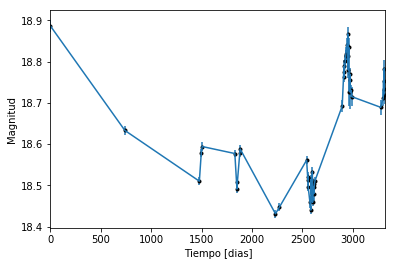

In [2]:
data = np.genfromtxt('LC_23343_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

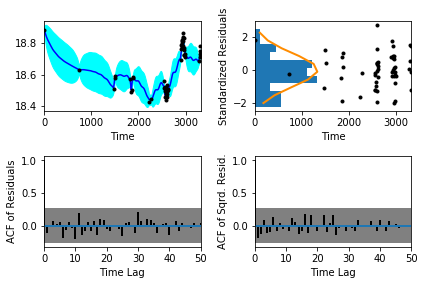

In [5]:
sample.assess_fit()

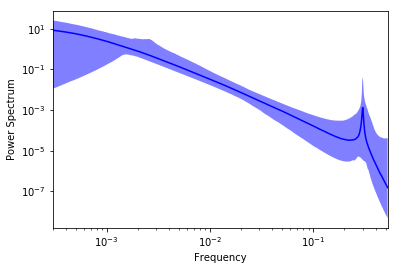

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0198382,'Medida del nivel de ruido')

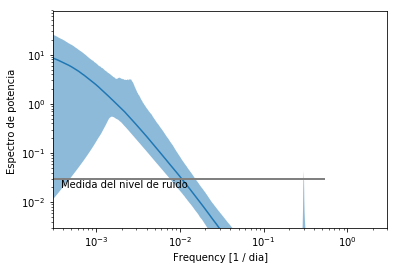

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

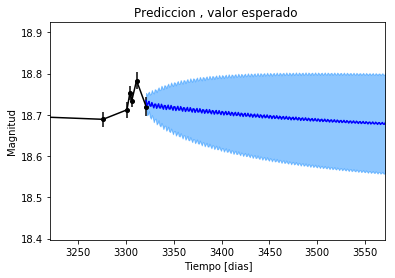

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion , valor esperado ')

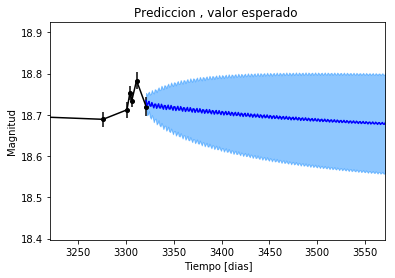

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


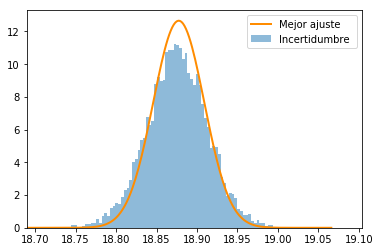

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

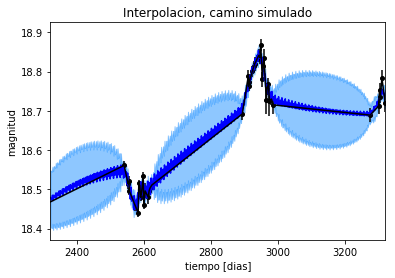

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

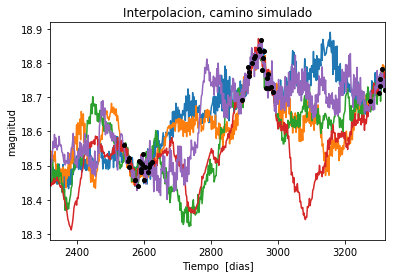

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 477.534027444
Median: 0.00195805483567
Standard deviation: 0.0424245174197
68% credibility interval: [ 0.00050917  0.01591221]
95% credibility interval: [ 0.00032427  0.08068972]
99% credibility interval: [ 0.0003071   0.25753339]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 442.016809993
Median: 0.00194099158415
Standard deviation: 0.0385906746831
68% credibility interval: [ 0.00050917  0.01574017]
95% credibility interval: [ 0.00032427  0.07905703]
99% credibility interval: [ 0.0003071   0.21558533]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 145.522932328
Median: 0.0684345723687
Standard deviation: 0.24166675488
68%

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 168.571832856
Median: 122.880141986
Standard deviation: 2.85362797907
68% credibility interval: [ 119.68778998  125.20816908]
95% credibility interval: [ 115.7570192   126.59444015]
99% credibility interval: [ 112.7668591   127.07503641]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 130.394640866
Median: 0.517322103995
Standard deviation: 1.66340003703
68% credibility interval: [ 0.16884065  2.5535833 ]
95% credibility interval: [ 0.07380897  6.18604467]
99% credibility interval: [ 0.04067513  6.87216523]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 193.637098328
Median: 3.6374403901
Standard deviation: 7.31416477635
68% credibility interval: [  3.52942554  19.33206286]
95% credibility interval: [  3.06947803  2

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 14181.5217681
Median: 1.08763298195e-12
Standard deviation: 1.07474316648e+44
68% credibility interval: [  3.10482634e-39   2.33297936e-01]
95% credibility interval: [  8.39588990e-52   4.09945230e+19]
99% credibility interval: [  4.90917521e-56   4.12685583e+35]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 639.668622031
Median: 18.6464381635
Standard deviation: 0.0657978479369
68% credibility interval: [ 18.59031045  18.70888948]
95% credibility interval: [ 18.52416109  18.79471498]
99% credibility interval: [ 18.46901703  18.8508928 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 221.980947553
Median: 0.302278296189
Standard deviation: 0.172957748078
68% credibility interval: [ 0.2978376   0.69730361]
95% credibility interval: [ 0.25953968  0.74614247]
99% credibility interval: [ 0.10671901  0.88989857]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 221.980947553
Median: 0.302278296189
Standard deviation: 0.172957748078
68% credibility interval: [ 0.2978376   0.69730361]
95% credibility interval: [ 0.25953968  0.74614247]
99% credibility interval: [ 0.10671901  0.88989857]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 410.301684358
Median: 0.0
Standard deviation: 0.000583435316129
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 168.571832856
Median: 122.880141986
Standard deviation: 2.85362797907
68% credibility interval: [ 119.68778998  125.20816908]
95% credibility interval: [ 115.7570192   126.59444015]
99% credibility interval: [ 112.7668591   127.07503641]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 263.999792051
Median: 0.0194924740526
Standard deviation: 0.0117853104435
68% credibility interval: [ 0.01305089  0.03117121]
95% credibility interval: [ 0.00963425  0.0530435 ]
99% credibility interval: [ 0.00765055  0.0799747 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 462.964563762
Median: 1.02884962705
Standard deviation: 0.210212753015
68% credibility interval: [ 0.85454629  1.23908917]
95% credibility interval: [ 0.71985     1.57794159]
99% credibility interval: [ 0.65665987  1.79363017]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 190.110543733
Median: 0.0185304067499
Standard deviation: 0.23783222059
68% credibility interval: [ 0.00614099  0.22530613]
95% credibility interval: [  6.79865538e-21   7.82981342e-01]
99% credibility interval: [  1.07723406e-37   1.29292217e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 477.534027444
Median: (-0.0123028213741-1.86197797774j)
Standard deviation: 1.11894026288
68% credibility interval: [-0.09997938-1.9468934j  -0.00319919-1.88270065j]
95% credibility interval: [-0.50698843-5.62293453j -0.00203744-4.40365384j]
99% credibility interval: [-1.61813001-6.43334073j -0.00192955-1.88292881j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 442.016809993
Median: (-0.0121956098029+1.90050340704j)
Standard deviation: 1.11344749984
68% credibility interval: [-0.09889840+1.96473087j -0.00319919+1.88270065j]
95% credibility interval: [-0.49672998+4.90516566j -0.00203744+4.40365384j]
99% credibility interval: [-1.35456261+4.95132654j -0.00192955+1.88292881j]
Posterior summary for parameter ar_roots  el